In [59]:
# basic model
import sys
import random
import numpy as np

np.random.seed(10)

sys.path.append("../")
import pandas as pd
import os
import matplotlib as plt
import src.preprocessing as pp

#import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    r2_score,
    f1_score
)
from itertools import permutations
from typing import List, Tuple

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.utils import resample

In [60]:
identifiers = ["date_id_a", "match_a", "wave_a", 
"date_id_b", "wave_b"] #"iid_b", "match_b", , "iid_a"

# same as 1_1
#preference = ["pf_o_att_a", "pf_o_sin_a", "pf_o_int_a", "pf_o_fun_a", "pf_o_amb_a", "pf_o_sha_a", 
#"pf_o_att_b", "pf_o_sin_b", "pf_o_int_b", "pf_o_fun_b", "pf_o_amb_b", "pf_o_sha_b"]

personal_info = ["field_cd_a", "age_a", "race_a", "income_a", "zipcode_area_a", "samerace_a", "goal_a",
"field_cd_b", "age_b", "race_b", "income_b", "zipcode_area_b", "goal_b", "distance_bin", "gender_a", "gender_b"] # "samerace_b",

behaviour = ["go_out_a", "sports_a", "tvsports_a", "exercise_a", "dining_a", "museums_a", "art_a", "hiking_a", "gaming_a",
           "clubbing_a", "reading_a", "tv_a", "theater_a", "movies_a", "concerts_a", "music_a", "shopping_a",
           "yoga_a", "exphappy_a",
           "go_out_b", "sports_b", "tvsports_b", "exercise_b", "dining_b", "museums_b", "art_b", "hiking_b", "gaming_b",
           "clubbing_b", "reading_b", "tv_b", "theater_b", "movies_b", "concerts_b", "music_b", "shopping_b",
           "yoga_b", "exphappy_b"]

difference_hobbies = ["go_out_df", "sports_df", "tvsports_df", "exercise_df", "dining_df", "museums_df", "art_df", "hiking_df", "gaming_df",
           "clubbing_df", "reading_df", "tv_df", "theater_df", "movies_df", "concerts_df", "music_df", "shopping_df", "yoga_df", "exphappy_df"]

looking_for = ["attr1_1_a", "sinc1_1_a", "intel1_1_a", "fun1_1_a", "amb1_1_a", "imprace_a", "imprelig_a",
"attr1_1_b", "sinc1_1_b", "intel1_1_b", "fun1_1_b", "amb1_1_b", "imprace_b", "imprelig_b"]

self_rating = [ "attr3_1_a", "sinc3_1_a", "intel3_1_a", "fun3_1_a", "amb3_1_a", "attr3_1_b", "sinc3_1_b", "intel3_1_b", "fun3_1_b", "amb3_1_b"]

# difference between what person a i slooking for b what person a rates themselves 1_1_a and 3_1_b
difference = ["attr_b_a", "sinc_b_a", "intel_b_a", "fun_b_a", "amb_b_a", "attr_a_b", "sinc_a_b", "intel_a_b", "fun_a_b", "amb_a_b"]

to_drop = ["date_id_a", "date_id_b", "wave_a", "wave_b", 'Unnamed: 0', "latitude_a", "latitude_b", "longitude_a", "longitude_b", "distance", "from_a", "from_b", "zipcode_a", "zipcode_b"] #TODO clean text in from column

to_keep = personal_info + identifiers + difference_hobbies + difference

categorical = ["income_a", "income_b", "distance_bin", "zipcode_area_b", "zipcode_area_a"]

In [61]:
df = pd.read_csv("../data/interim/single_row_date.csv")
df.columns

Index(['Unnamed: 0', 'date_id_a', 'match_a', 'wave_a', 'pf_o_att_a',
       'pf_o_sin_a', 'pf_o_int_a', 'pf_o_fun_a', 'pf_o_amb_a', 'pf_o_sha_a',
       ...
       'tv_df', 'theater_df', 'movies_df', 'concerts_df', 'music_df',
       'shopping_df', 'yoga_df', 'exphappy_df', 'distance', 'distance_bin'],
      dtype='object', length=133)

In [62]:
# read in data

df = df[to_keep]
#df.drop(to_drop, axis = 1, inplace = True)
df.drop(["date_id_a", "date_id_b"], axis = 1, inplace = True)

In [63]:
df = pd.get_dummies(df, columns = categorical)

In [64]:
df.columns[df.isnull().any()].tolist()
df.isnull().sum().sort_values(ascending=False).head(10)
df.dropna(inplace=True)

In [65]:
X = df[[column for column in df.columns if column!="match_a"]]
y = df["match_a"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.30, stratify=y, shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2000, 282) (2000,)
(858, 282) (858,)


In [67]:
def random_forest(X_train, Y_train, X_test, Y_test):

    classifier = LogisticRegression(random_state=42, max_iter= 10000)#, class_weight = "balanced"
    classifier.fit(X_train, Y_train)

    # get accuracy score
    score = classifier.score(X_test, Y_test)

    y_pred = classifier.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()

    f1_score = metrics.f1_score(Y_test, y_pred)

    return {"clf_model": classifier, "accuracy": score, "F1_score": f1_score}

Precision: 0.875
Recall: 0.04895104895104895
Accuracy: 0.8403263403263403
F1 Score: 0.09271523178807947


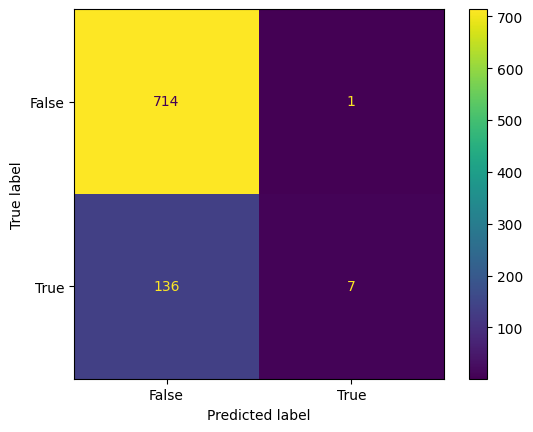

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import src.preprocessing as pp

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

pp.scoring_func(y_test, clf.predict(X_test))

In [69]:
train_df = X_train.copy()
train_df["match_a"] = y_train

Upsample multiplier:  1.2
X_train shape is:  (2067, 282) X_train shape is:  (2067,)
Precision: 0.6666666666666666
Recall: 0.013986013986013986
Accuracy: 0.8344988344988346
F1 Score: 0.027397260273972605
Upsample multiplier:  1.5
X_train shape is:  (2167, 282) X_train shape is:  (2167,)
Precision: 0.75
Recall: 0.02097902097902098
Accuracy: 0.8356643356643356
F1 Score: 0.04081632653061225
Upsample multiplier:  1.7
X_train shape is:  (2233, 282) X_train shape is:  (2233,)
Precision: 1.0
Recall: 0.013986013986013986
Accuracy: 0.8356643356643356
F1 Score: 0.027586206896551724
Upsample multiplier:  2
X_train shape is:  (2333, 282) X_train shape is:  (2333,)
Precision: 0.4444444444444444
Recall: 0.027972027972027972
Accuracy: 0.8321678321678322
F1 Score: 0.052631578947368425
Upsample multiplier:  2.2
X_train shape is:  (2400, 282) X_train shape is:  (2400,)
Precision: 0.42857142857142855
Recall: 0.02097902097902098
Accuracy: 0.8321678321678322
F1 Score: 0.039999999999999994
Upsample multiplie

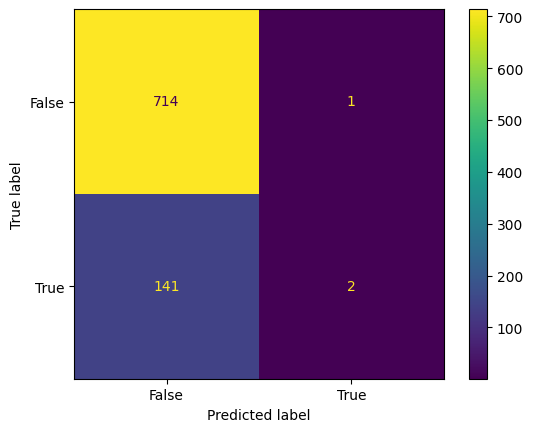

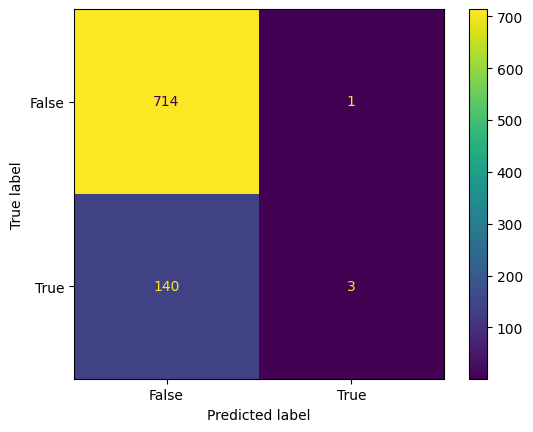

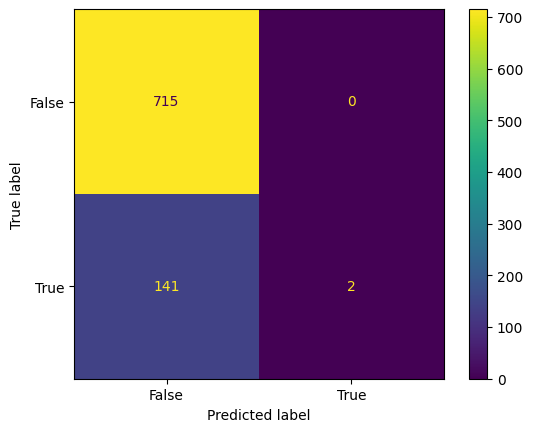

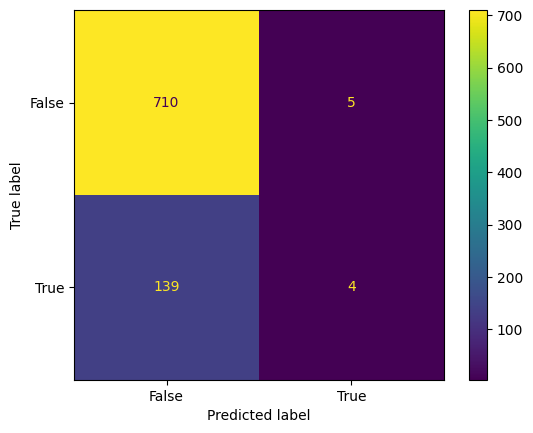

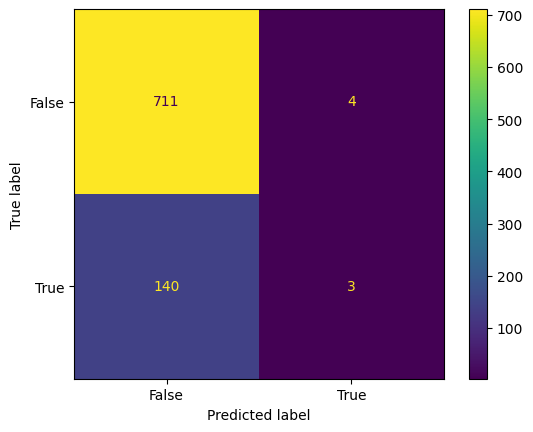

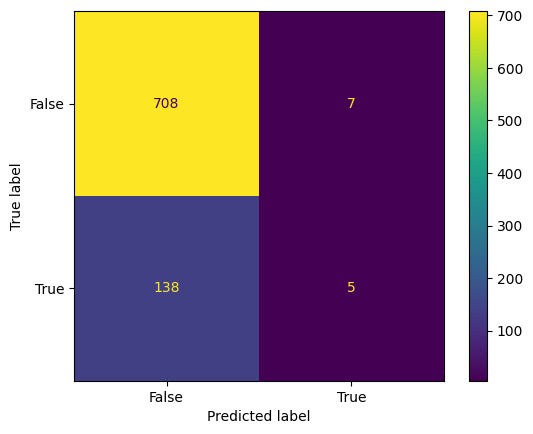

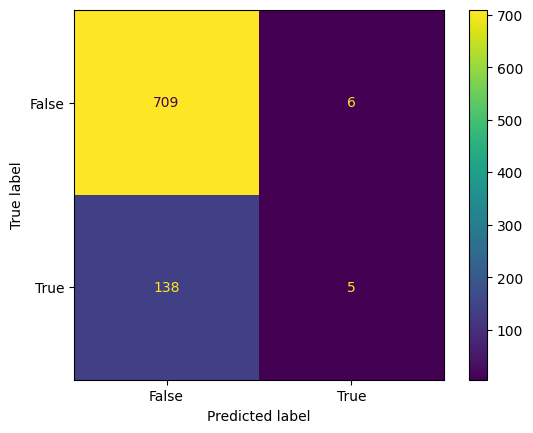

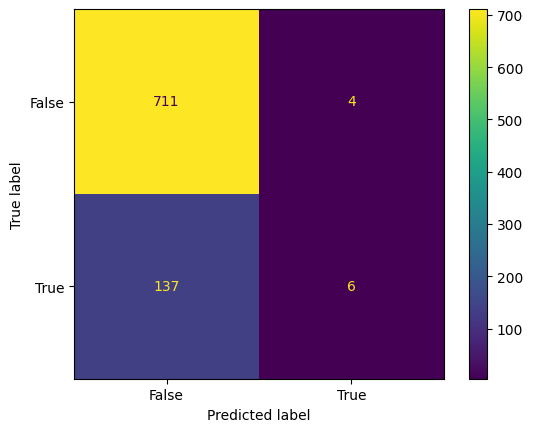

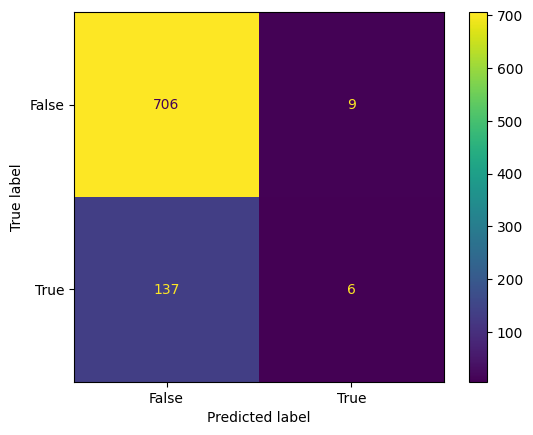

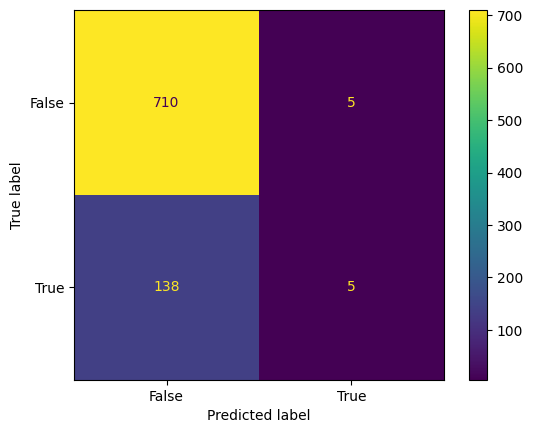

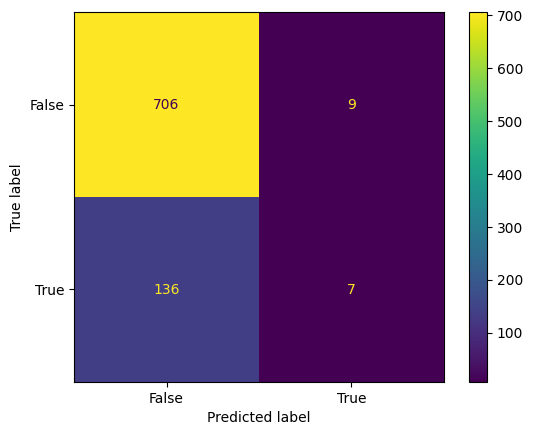

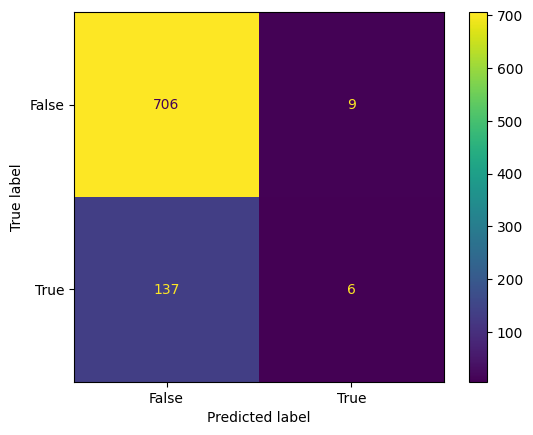

In [70]:
# looking for best performing upsample multiplier
for m in [1.2, 1.5, 1.7, 2, 2.2, 2.5, 2.7, 3, 3.2, 3.5, 3.7, 4]:
    print("Upsample multiplier: ", m)
    pp.resample_data(train_df, m, X_test, y_test, RandomForestClassifier(random_state=0))

X_train shape is:  (2733, 282) X_train shape is:  (2733,)
Precision: 0.4
Recall: 0.04195804195804196
Accuracy: 0.8298368298368298
F1 Score: 0.07594936708860758


RandomForestClassifier(random_state=0)

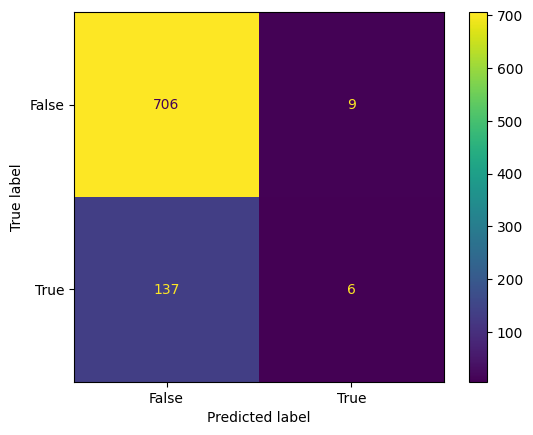

In [71]:
pp.resample_data(train_df, 3.2, X_test, y_test, RandomForestClassifier(random_state=0))